In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder ,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Age', ylabel='Count'>

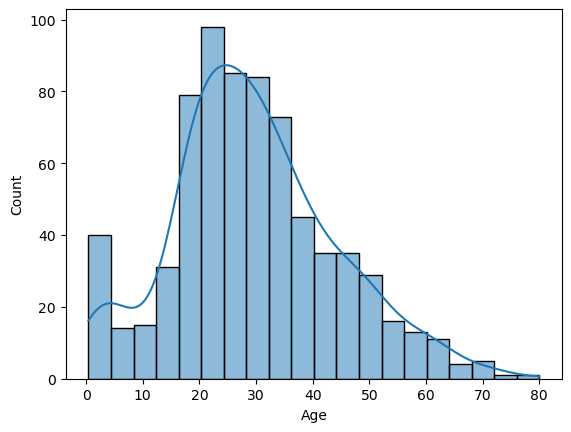

In [6]:
sns.histplot(df['Age'] , kde = True)

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
df['Age'] = df['Age'].fillna(int(np.mean(df['Age'])))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [12]:
survivedAges = df.groupby('Age')['Survived'].sum()

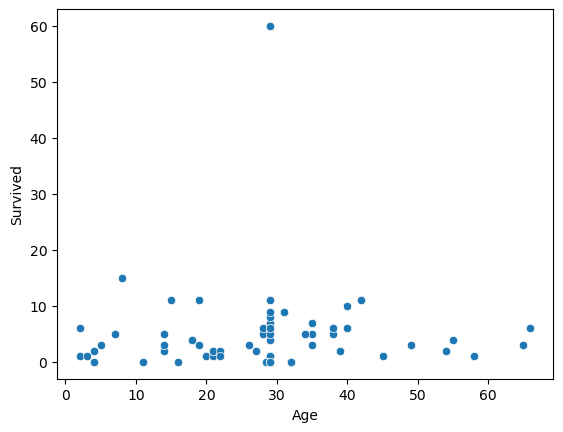

In [13]:
sns.scatterplot(x = df['Age'] , y = survivedAges)
plt.show()

In [14]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [15]:
df = df.reset_index()

In [16]:
df.drop('index',axis=1,inplace = True)

In [17]:
ohe = OneHotEncoder()
df = pd.concat([df, pd.DataFrame(ohe.fit_transform(df[['Embarked']]).toarray())],axis = 1)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
0,0,3,1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,S,0.0,0.0,1.0
885,1,1,0,19.0,0,0,30.0000,S,0.0,0.0,1.0
886,0,3,0,29.0,1,2,23.4500,S,0.0,0.0,1.0
887,1,1,1,26.0,0,0,30.0000,C,1.0,0.0,0.0


In [19]:
df.drop('Embarked',axis = 1,inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   0         889 non-null    float64
 8   1         889 non-null    float64
 9   2         889 non-null    float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 66.1 KB


In [21]:
df.columns = df.columns.astype(str)

In [22]:
x_train = df.drop('Survived',axis = 1)
y_train = df['Survived']

In [23]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [24]:
dt.score(x_train,y_train)

0.9190101237345332